In [10]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [11]:
#Load Cleansed Data
df_analysis_InternationalRestrictions = pd.read_csv('/content/New_Cleansed_Data.csv')

In [12]:
#Transform InternationalRestrictions Info
df_analysis_InternationalRestrictions.loc[df_analysis_InternationalRestrictions['InternationalRestrictions'] == 0, 'InternationalRestrictionsDetail'] = 'No_Measure'
df_analysis_InternationalRestrictions.loc[df_analysis_InternationalRestrictions['InternationalRestrictions'] == 1, 'InternationalRestrictionsDetail'] = 'Screening_Arrivals'
df_analysis_InternationalRestrictions.loc[df_analysis_InternationalRestrictions['InternationalRestrictions'] == 2, 'InternationalRestrictionsDetail'] = 'Quarantine_Arrivals_Few'
df_analysis_InternationalRestrictions.loc[df_analysis_InternationalRestrictions['InternationalRestrictions'] == 3, 'InternationalRestrictionsDetail'] = 'Ban_Arrivals_Few'
df_analysis_InternationalRestrictions.loc[df_analysis_InternationalRestrictions['InternationalRestrictions'] == 4, 'InternationalRestrictionsDetail'] = 'Ban_Arrivals_All'

In [13]:
#Select Specific Columns
df_analysis_InternationalRestrictions= df_analysis_InternationalRestrictions[['State', 'Date','InternationalRestrictionsDetail']]

In [14]:
df_graph_InternationalRestrictions = df_analysis_InternationalRestrictions.groupby(['State', 'InternationalRestrictionsDetail'])['Date'].count().reset_index(name = 'Counts')

In [15]:
df1_graph_InternationalRestrictions = pd.pivot_table(df_graph_InternationalRestrictions, values= 'Counts', index= ['State'], columns= 'InternationalRestrictionsDetail').reset_index()

In [16]:
import matplotlib.pyplot as plt

Text(0, 0.5, '# of Days')

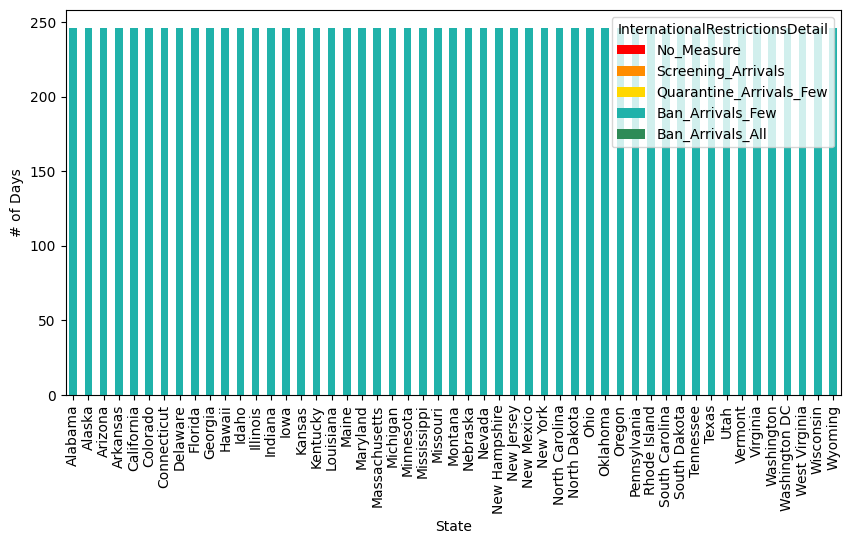

In [22]:
if "No_Measure" not in df1_graph_InternationalRestrictions.columns:
    df1_graph_InternationalRestrictions = df1_graph_InternationalRestrictions.assign(No_Measure=0, Screening_Arrivals=0, Quarantine_Arrivals_Few=0, Ban_Arrivals_All=0)

colors = ["red", "darkorange", "gold", "lightseagreen", "seagreen"]
df1_graph_InternationalRestrictions.plot(x= "State", y= ["No_Measure", "Screening_Arrivals", "Quarantine_Arrivals_Few", "Ban_Arrivals_Few", "Ban_Arrivals_All"], kind= "bar", stacked= "true", figsize= (10, 5), color=colors)
plt.ylabel("# of Days")